In [1]:
from PyPESTO.FRP import create_FRP2_v4
from PyPESTO.FRP.petab_ import plot_measurements
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
# sbml_model_filepath = '/SBML/PyPESTO/FRP/sbml_model.xml'
amici_model, sbml_model_filepath = create_FRP2_v4.load_amici_from_sbml()

Creating SBML model (FRP2 v4)
Creating species.
Generating parameters.
Num Termination Reactions: 10
Creating reactions
Importing AMICI model from SBML


In [161]:


from venv import create


def plot_conversion_vs_time(mdf):
    fig, axs = plt.subplots(1, 2)
    for c in range(6):
        tmdf = mdf[mdf['simulationConditionId'] == f'c_{c}']
        axs[0].plot(tmdf['time'], tmdf['xA'])
        axs[1].plot(tmdf['time'], tmdf['xB'])
        axs[0].set_ylim(0, 1.1)
        axs[1].set_ylim(0, 1.1)
    plt.show()
    
def plot_conversion_A_vs_B(mdf):
    fig, ax = plt.subplots(1, 1)
    for c in range(6):
        tmdf = mdf[mdf['simulationConditionId'] == f'c_{c}']
        ax.plot(tmdf['xB'], tmdf['xA'])
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, 1.1)
    plt.show()
    
n_pts = 60
kt_kp_ratio_log_range = [-8, 6]
kd_kt_log_range = [-10, 6]
kt_kp_ratios = 10**np.linspace(min(kt_kp_ratio_log_range), max(kt_kp_ratio_log_range), n_pts)
kd_kts = 10**np.linspace(min(kd_kt_log_range), max(kd_kt_log_range), n_pts)
var_matrix = np.zeros((len(kd_kts), len(kt_kp_ratios)))

create_FRP2_v4.kpAA_true = 1e0
create_FRP2_v4.rA_true = 10.0
create_FRP2_v4.rB_true = 0.1
create_FRP2_v4.rX_true = 1.0
create_FRP2_v4.KAA_true = 0
create_FRP2_v4.KAB_true = 0
create_FRP2_v4.KBA_true = 0
create_FRP2_v4.KBB_true = 0

for i, kd_kt in enumerate(kd_kts):
    for j, kt_kp_ratio in enumerate(kt_kp_ratios):
        create_FRP2_v4.kt_kp_ratio_true = kt_kp_ratio
        create_FRP2_v4.kd_kt_true = kd_kt
        create_FRP2_v4.kt_true = create_FRP2_v4.kt_kp_ratio_true * create_FRP2_v4.kpAA_true
        create_FRP2_v4.kd_true = create_FRP2_v4.kd_kt_true / create_FRP2_v4.kt_true
    
        # print(kt_kp_ratio, kd_kt)
        
        cdf, mdf = create_FRP2_v4.generate_FRP_data(amici_model)
        mdf = mdf[mdf['time'] > 0]
        # print(mdf)
        var_xA = np.var(mdf['xA'])
        var_xB = np.var(mdf['xB'])
        var = var_xA + var_xB
        
        var_matrix[i, j] = var
        
        if var > 0.15:
            print(f'kpAA: {create_FRP2_v4.kpAA_true}')
            print(f'kt: {create_FRP2_v4.kt_true}')
            print(f'kd: {create_FRP2_v4.kd_true}')

kpAA: 1.0
kt: 1e-08
kd: 0.01
kpAA: 1.0
kt: 1.726983290659436e-08
kd: 0.005790443980602484
kpAA: 1.0
kt: 2.982471286216888e-08
kd: 0.00335292414924956
kpAA: 1.0
kt: 5.150678076168122e-08
kd: 0.0019414919457438817
kpAA: 1.0
kt: 8.895134973108236e-08
kd: 0.0011242100350620863
kpAA: 1.0
kt: 1.5361749466718295e-07
kd: 0.0006509675230458164
kpAA: 1.0
kt: 2.6529484644318947e-07
kd: 0.00037693909753883635
kpAA: 1.0
kt: 4.581597669054491e-07
kd: 0.00021826447283974872
kpAA: 1.0
kt: 7.912342618981327e-07
kd: 0.00012638482029342973
kpAA: 1.0
kt: 2.982471286216888e-08
kd: 0.0062605165720148155
kpAA: 1.0
kt: 5.150678076168122e-08
kd: 0.0036251170499885283
kpAA: 1.0
kt: 8.895134973108236e-08
kd: 0.00209910372010855
kpAA: 1.0
kt: 1.5361749466718295e-07
kd: 0.0012154742500762835
kpAA: 1.0
kt: 2.6529484644318947e-07
kd: 0.0007038135554931547
kpAA: 1.0
kt: 4.581597669054491e-07
kd: 0.00040753929658717697
kpAA: 1.0
kt: 7.912342618981327e-07
kd: 0.0002359833466782189
kpAA: 1.0
kt: 1.3664483492953243e-06
k

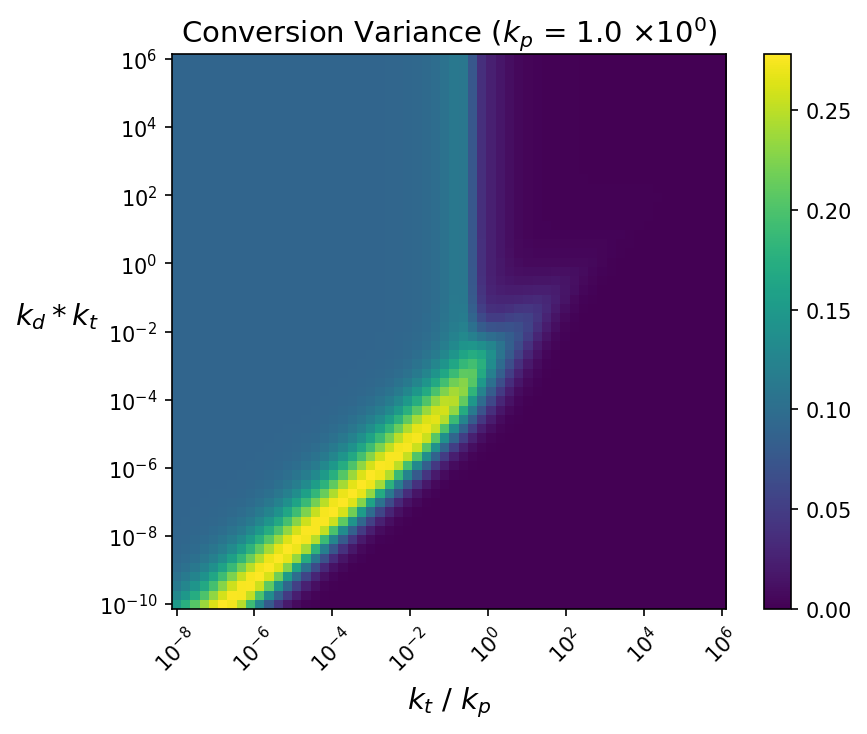

In [162]:
plt.figure(dpi=150)
plt.imshow(var_matrix, origin='lower')
plt.ylabel('$k_d*k_t$', rotation=0, labelpad=20, fontsize=14)
plt.xlabel('$k_t$ / $k_p$', fontsize=14)
plt.colorbar()

# Define tick positions based on the range of values
x_tick_vals = np.array([10**i for i in range(min(kt_kp_ratio_log_range), max(kt_kp_ratio_log_range)+1, 2)])  # Powers of ten from 10^-8 to 10^6
y_tick_vals = np.array([10**i for i in range(min(kd_kt_log_range), max(kd_kt_log_range)+1, 2)])  # Powers of ten from 10^-10 to 10^6

# Calculate approximate positions of these ticks relative to the data range
x_tick_positions = np.interp(np.log10(x_tick_vals), np.linspace(min(kt_kp_ratio_log_range), max(kt_kp_ratio_log_range), n_pts), np.arange(n_pts))
y_tick_positions = np.interp(np.log10(y_tick_vals), np.linspace(min(kd_kt_log_range), max(kd_kt_log_range), n_pts), np.arange(n_pts))

# Set the ticks and labels for powers of ten
# kp_pow = int(np.log10(create_FRP2_v4.kpAA_true))
kpAA_value = create_FRP2_v4.kpAA_true
kpAA_sci = "{:.1e}".format(kpAA_value)
kpAA_base, kpAA_exp = kpAA_sci.split("e")
kpAA_base = float(kpAA_base)
kpAA_exp = int(kpAA_exp)

# Use LaTeX formatting for the title
plt.title(f'Conversion Variance ($k_p$ = {kpAA_base} $\\times 10^{{{kpAA_exp}}}$)', fontsize=14)
# plt.title(f'Conversion Variance ($k_p$ = $10^{kp_pow}$) ')
plt.xticks(x_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in x_tick_vals], rotation=45)
plt.yticks(y_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in y_tick_vals])

# Show the plot
plt.show()

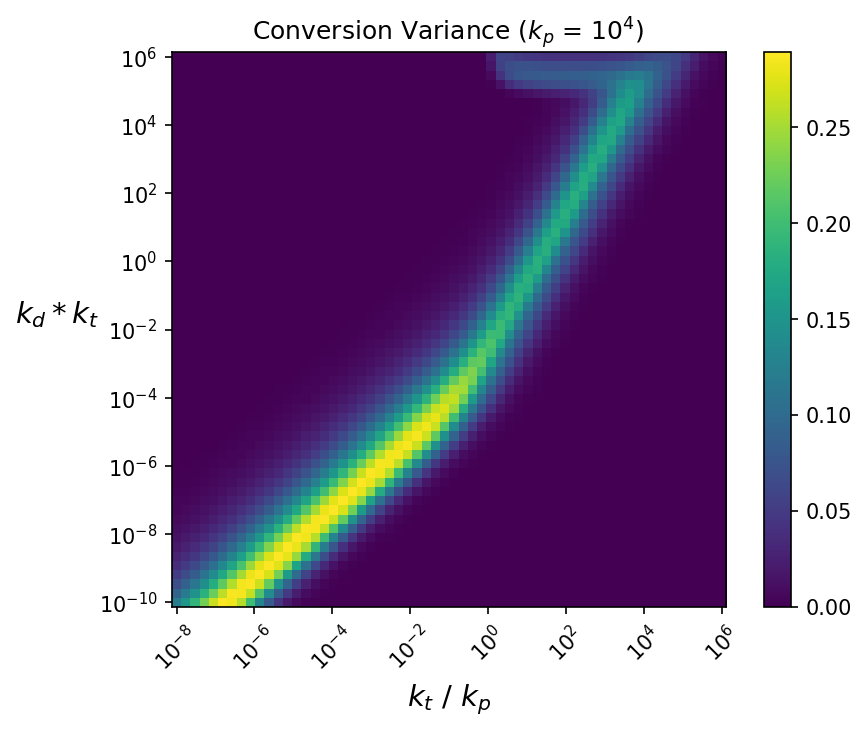

In [154]:
plt.figure(dpi=150)
plt.imshow(var_matrix, origin='lower')
plt.ylabel('$k_d*k_t$', rotation=0, labelpad=20, fontsize=14)
plt.xlabel('$k_t$ / $k_p$', fontsize=14)
plt.colorbar()

# Define tick positions based on the range of values
x_tick_vals = np.array([10**i for i in range(min(kt_kp_ratio_log_range), max(kt_kp_ratio_log_range)+1, 2)])  # Powers of ten from 10^-8 to 10^6
y_tick_vals = np.array([10**i for i in range(min(kd_kt_log_range), max(kd_kt_log_range)+1, 2)])  # Powers of ten from 10^-10 to 10^6

# Calculate approximate positions of these ticks relative to the data range
x_tick_positions = np.interp(np.log10(x_tick_vals), np.linspace(min(kt_kp_ratio_log_range), max(kt_kp_ratio_log_range), n_pts), np.arange(n_pts))
y_tick_positions = np.interp(np.log10(y_tick_vals), np.linspace(min(kd_kt_log_range), max(kd_kt_log_range), n_pts), np.arange(n_pts))

# Set the ticks and labels for powers of ten
kp_pow = int(np.log10(create_FRP2_v4.kpAA_true))
plt.title(f'Conversion Variance ($k_p$ = $10^{kp_pow}$) ')
plt.xticks(x_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in x_tick_vals], rotation=45)
plt.yticks(y_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in y_tick_vals])

# Show the plot
plt.show()

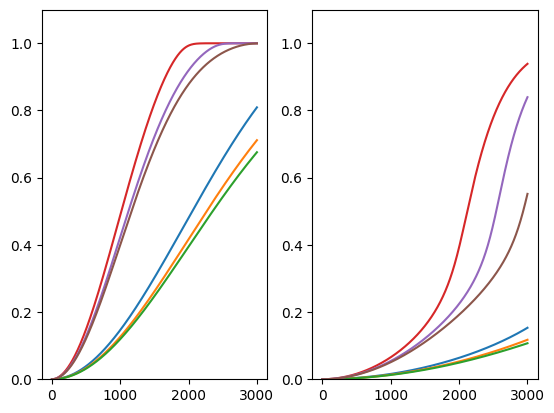

In [167]:
create_FRP2_v4.kpAA_true = 1e0
create_FRP2_v4.kt_kp_ratio_true = 1e-4
create_FRP2_v4.kd_kt_true = 1e-8
create_FRP2_v4.kt_true = create_FRP2_v4.kt_kp_ratio_true * create_FRP2_v4.kpAA_true
create_FRP2_v4.kd_true = create_FRP2_v4.kd_kt_true / create_FRP2_v4.kt_true
# print(kt_kp_ratio, kd_kt)

cdf, mdf = create_FRP2_v4.generate_FRP_data(amici_model)
mdf = mdf[mdf['time'] > 0]
plot_conversion_vs_time(mdf)


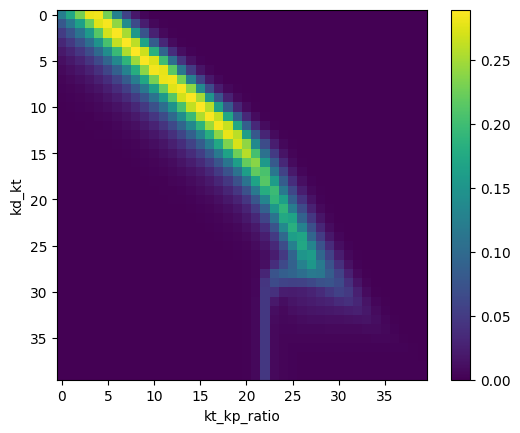

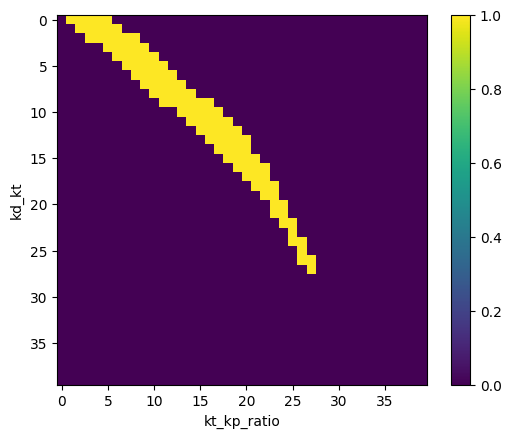

In [122]:
import matplotlib.pyplot as plt
plt.imshow(var_matrix)
plt.ylabel('kd_kt')
plt.xlabel('kt_kp_ratio')
plt.colorbar()
plt.show()
plt.imshow(var_matrix > 0.15)
plt.ylabel('kd_kt')
plt.xlabel('kt_kp_ratio')
plt.colorbar()

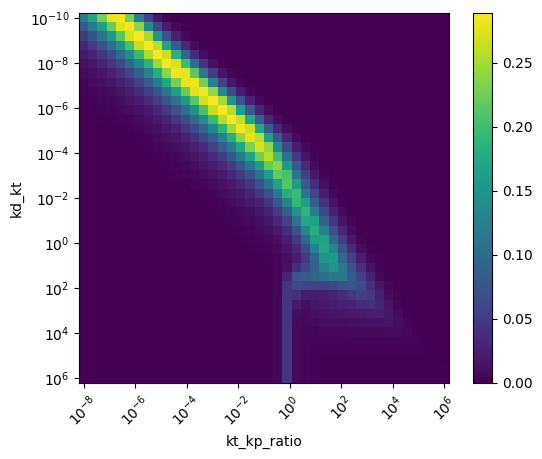

In [114]:
import matplotlib.pyplot as plt

plt.imshow(var_matrix)
plt.ylabel('kd_kt')
plt.xlabel('kt_kp_ratio')
plt.colorbar()

# Define tick positions based on the range of values
x_tick_vals = np.array([10**i for i in range(-8, 7, 2)])  # Powers of ten from 10^-8 to 10^6
y_tick_vals = np.array([10**i for i in range(-10, 7, 2)])  # Powers of ten from 10^-10 to 10^6

# Calculate approximate positions of these ticks relative to the data range
x_tick_positions = np.interp(np.log10(x_tick_vals), np.linspace(-8, 6, n_pts), np.arange(n_pts))
y_tick_positions = np.interp(np.log10(y_tick_vals), np.linspace(-10, 6, n_pts), np.arange(n_pts))

# Set the ticks and labels for powers of ten
plt.xticks(x_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in x_tick_vals], rotation=45)
plt.yticks(y_tick_positions, [f'$10^{{{int(np.log10(val))}}}$' for val in y_tick_vals])

# Show the plot
plt.show()

# plt.show()
# plt.imshow(var_matrix > 0.10)
# plt.ylabel('kd_kt')
# plt.xlabel('kt_kp_ratio')
# plt.colorbar()

Visualization table not available. Skipping.


0 0.02 0.25 0.75
[ 2.45476423e-01  1.75598094e-01  1.25183606e-01  9.17884040e-02
  6.89275686e-02  5.18841090e-02  3.70343263e-02  3.40779723e-02
  1.77169535e-02  1.49060109e-02  2.10524371e-02  1.00545691e-02
  1.14931123e-02 -1.91151324e-03 -9.61762727e-04  6.73599363e-03
  1.60662783e-04  4.53246331e-03  3.69398547e-03  4.69433460e-03] [0.74881521 0.54367175 0.41943012 0.30785401 0.22786496 0.16787518
 0.1293908  0.09036421 0.07161378 0.05883291 0.04368094 0.02702388
 0.02348028 0.01274739 0.01028039 0.00264414 0.00476096 0.01022804
 0.00814573 0.02002947]
1 0.02 0.5 0.5
[0.49808054 0.3807672  0.30038975 0.23889196 0.19751471 0.17062647
 0.14799698 0.12829592 0.1064593  0.09994109 0.09213376 0.07837037
 0.07842284 0.06658326 0.05646907 0.06680695 0.04946154 0.05652258
 0.04199775 0.04744162] [0.49753124 0.40325445 0.32892688 0.25934272 0.21747682 0.18399402
 0.15241941 0.13077078 0.09784634 0.07802467 0.0743144  0.05690448
 0.05583287 0.03650586 0.03814877 0.02508653 0.01825433 0.

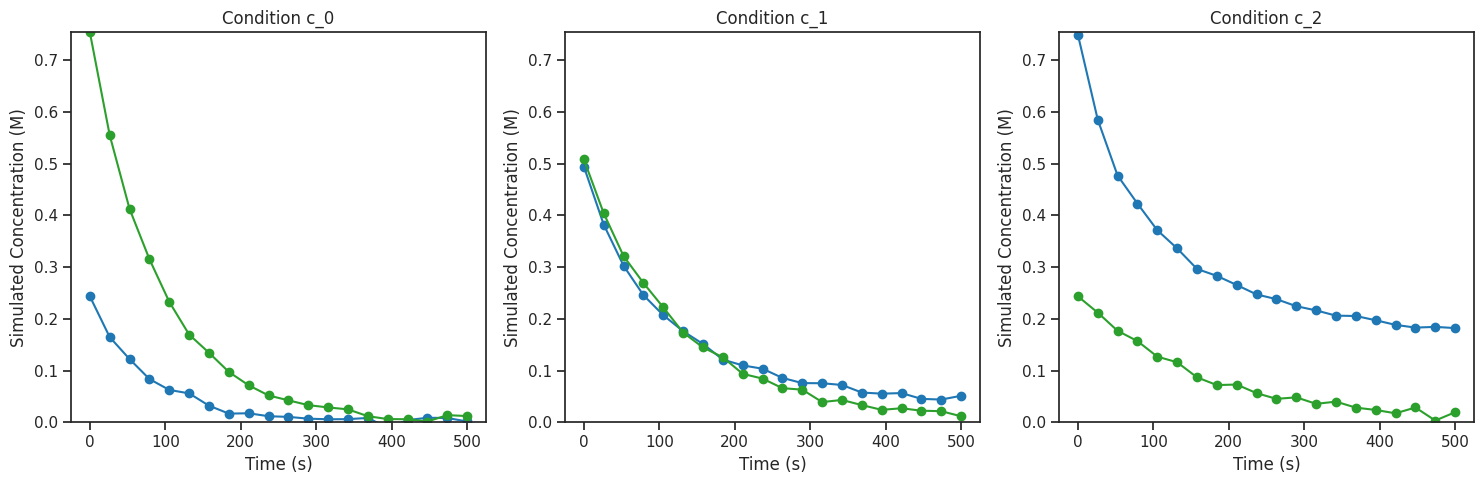

In [101]:
# create_FRP2_v4.kd_true = kd_true = 1e-6
# create_FRP2_v4.kt_true = kt_true = 0*1e6

# create_FRP2_v4.kpAA_true = kpAA_true = 1 + 0*1e6
# create_FRP2_v4.rA_true = rA_true = 0.5
# create_FRP2_v4.rB_true = rB_true = 18
# create_FRP2_v4.rX_true = rX_true = 1.0
# create_FRP2_v4.KBB_true = KBB_true = 0.5

create_FRP2_v4.kd_true = kd_true = 0
create_FRP2_v4.kt_true = kt_true = 0

create_FRP2_v4.kpAA_true = kpAA_true = 1
create_FRP2_v4.rA_true = rA_true = 4.0
create_FRP2_v4.rB_true = rB_true = 0.8
create_FRP2_v4.rX_true = rX_true = 1.0
# create_FRP2_v4.KAA_true = KAA_true = 0.5
# create_FRP2_v4.KAB_true = KAB_true = 0.05
# create_FRP2_v4.KBA_true = KBA_true = 0.3
create_FRP2_v4.KAA_true = KAA_true = 0.5
create_FRP2_v4.KAB_true = KAB_true = 0.0
create_FRP2_v4.KBA_true = KBA_true = 0.0
create_FRP2_v4.KBB_true = KBB_true = 0.0

# rA_true = 4.0
# rB_true = 0.8
# rX_true = 1.0
# KAA_true = 0.5
# KAB_true = 0.05
# KBA_true = 0.3
# KBB_true = 0.1


# create_FRP2_v4.kt_kp_ratio_true = kt_kp_ratio_true = kt_true / kpAA_true
# create_FRP2_v4.kd_kp_true = kd_kp_true = kd_true * kpAA_true
# create_FRP2_v4.kp_kt_ratio_true = kp_kt_ratio_true = kpAA_true / kt_true
# create_FRP2_v4.kd_kt_true = kd_kt_true = kd_true * kt_true

yaml_filepath = create_FRP2_v4.write_petab_files(amici_model, sbml_model_filepath)
observables_df, conditions_df, measurements_df = create_FRP2_v4.define_FRP_measurements(amici_model)
axs = plot_measurements(measurements_df, conversion=False)

In [102]:
import logging

import numpy as np
import petab
import amici
import amici.plotting
import sys
import os
import importlib

import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

# log diagnostics
logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

# import to petab
yaml_filepath = '/SBML/PyPESTO/FRP/FRP2_v4/FRP2_v4.yaml'
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# importer = pypesto.petab.PetabImporter(petab_problem, model_name=create_FRP_v1.MODEL_NAME)

importer = pypesto.petab.PetabImporter.from_yaml(
    yaml_filepath,
    model_name=create_FRP2_v4.MODEL_NAME,
)

# Works when it runs twice for some reason
try:
    problem = importer.create_problem(force_compile=True)
except:
    problem = importer.create_problem(force_compile=True)

Visualization table not available. Skipping.
Compiling amici model to folder /SBML/amici_models/0.26.1/FRP2_v4.
Compiling amici model to folder /SBML/amici_models/0.26.1/FRP2_v4.
2024-11-12 15:23:12.498 - amici.petab.sbml_import - INFO - Importing model ...
2024-11-12 15:23:12.499 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2024-11-12 15:23:12.553 - amici.petab.sbml_import - INFO - Model name is 'FRP2_v4'.
Writing model code to '/SBML/amici_models/0.26.1/FRP2_v4'.
2024-11-12 15:23:12.555 - amici.petab.sbml_import - INFO - Species: 13
2024-11-12 15:23:12.556 - amici.petab.sbml_import - INFO - Global parameters: 22
2024-11-12 15:23:12.556 - amici.petab.sbml_import - INFO - Reactions: 33
2024-11-12 15:23:12.567 - amici.sbml_import - DEBUG - Finished validating SBML                    ++ (8.44E-04s)
2024-11-12 15:23:12.578 - amici.sbml_import - DEBUG - Finished converting SBML local parameters   ++ (2.06E-03s)
2024-11-12 15:2

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

0 0.02 0.25 0.75
[ 0.24558839  0.17738049  0.12107096  0.08780188  0.06643348  0.05513387
  0.04189734  0.02584595  0.02568963  0.00613789  0.00739118  0.02060881
  0.01572878  0.01200842  0.00555573  0.00813552 -0.00310346 -0.00543009
  0.00391593 -0.00036651] [0.74917657 0.56457762 0.41401156 0.31941828 0.22053597 0.16586009
 0.12453633 0.09034867 0.06846226 0.04188363 0.03501853 0.03289887
 0.02416884 0.02086624 0.01419508 0.00972366 0.00766198 0.00149858
 0.00571494 0.00384644]
1 0.02 0.5 0.5
[0.50514241 0.37788328 0.29856081 0.23994586 0.20828831 0.17369172
 0.15210548 0.13254501 0.10949176 0.10158721 0.09609431 0.08199988
 0.06638884 0.06489333 0.06359449 0.05400723 0.06940389 0.05470062
 0.04731808 0.05170896] [0.49168616 0.39303991 0.32946938 0.26505579 0.22948814 0.18656358
 0.14512674 0.11758185 0.10121023 0.08568452 0.06509907 0.04905542
 0.05537428 0.03652708 0.03928012 0.03218081 0.01186291 0.01800632
 0.02179337 0.00858292]
2 0.02 0.75 0.25
[0.75628097 0.57502222 0.485610

array([<Axes: title={'center': 'Condition c_0'}, xlabel='Time (s)', ylabel='Conversion'>,
       <Axes: title={'center': 'Condition c_1'}, xlabel='Time (s)', ylabel='Conversion'>,
       <Axes: title={'center': 'Condition c_2'}, xlabel='Time (s)', ylabel='Conversion'>],
      dtype=object)

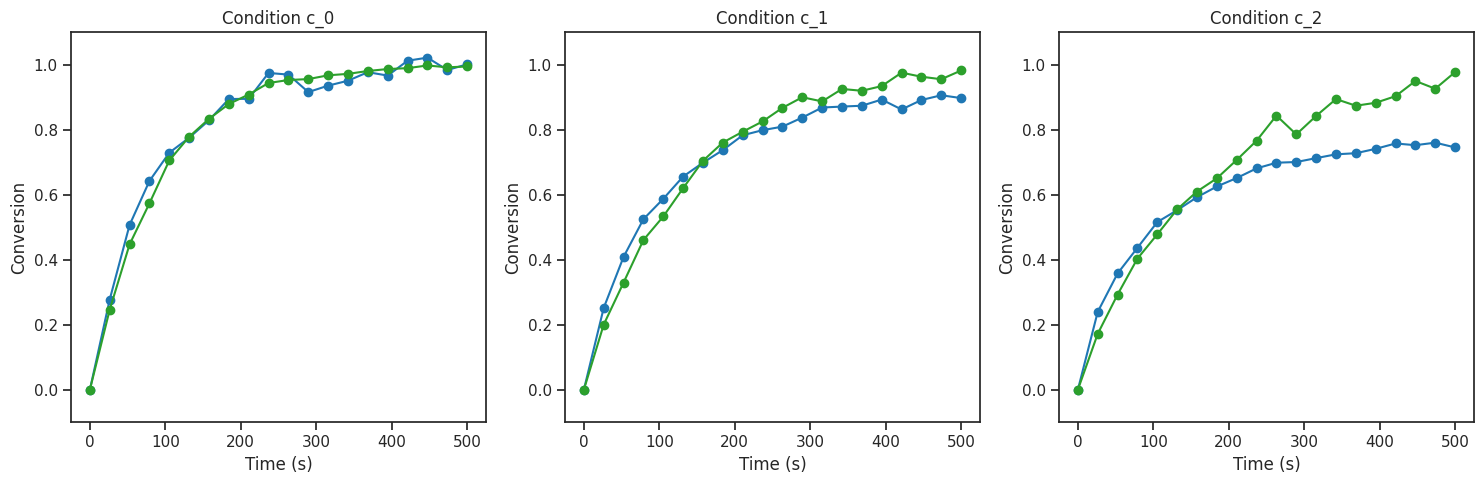

In [103]:
observables_df, conditions_df, measurements_df = create_FRP2_v4.define_FRP_measurements(amici_model)

plot_measurements(measurements_df, conversion=True)

In [ ]:
conv_df = measurements_df.copy()
conditions = measurements_df[SIMULATION_CONDITION_ID].unique()
observables = measurements_df[OBSERVABLE_ID].unique()
variance_dict = {}
for c in conditions:
    for o in observables:
        meas_data = conv_df.loc[(conv_df[SIMULATION_CONDITION_ID] == c) & (conv_df[OBSERVABLE_ID] == o), MEASUREMENT]
        max_conc = meas_data.max()
        conv_data = (max_conc - meas_data) / max_conc
        conv_df.loc[(conv_df[SIMULATION_CONDITION_ID] == c) & (conv_df[OBSERVABLE_ID] == o), MEASUREMENT] = conv_data
        
        # Compute the variance of the converted data
        variance_dict[(c, o)] = conv_data.var()

print(np.sum(list(variance_dict.values())))
variance_dict

In [ ]:
# x axis: kp_kt_ratio
# y axis: kd_kt

# Create a heatmap of some kind of measure of data "quality"
# Bad data:
# - data stays at initial value (too slow)
# - data instantly goes to zero (too fast)

# Create a grid of parameter values
kp_kt_ratio_values = np.logspace(-6, 6, 100, base=10)
kd_kt_values = np.logspace(-6, 6, 100, base=10)



# Run the simulations for these parameters
# Calculate the data quality metric for each set of parameters (sum of variances)
# Plot the heatmap

# kd, kp, kt

In [ ]:
kp_kt_ratio_values

In [104]:
optimizer = optimize.ScipyOptimizer(method='Nelder-Mead')
history_options = pypesto.HistoryOptions(trace_record=True)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 1000

# run optimization of problem 1
result = optimize.minimize(
    problem=problem, 
    optimizer=optimizer, 
    n_starts=n_starts,
    engine=engine,
    history_options=history_options,
)

Engine will use up to 8 processes (= CPU count).
100%|███████████████████████████████████████| 1000/1000 [03:09<00:00,  5.27it/s]


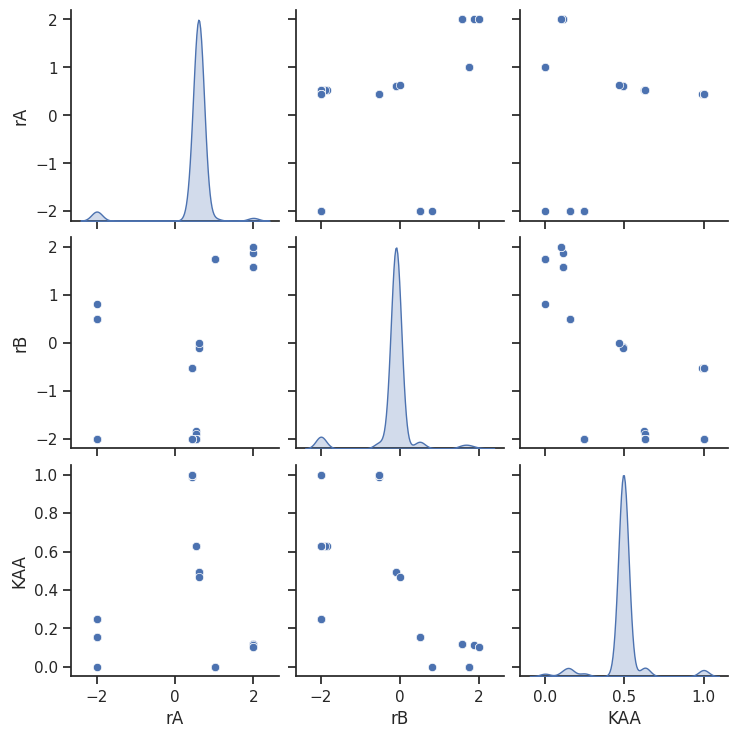

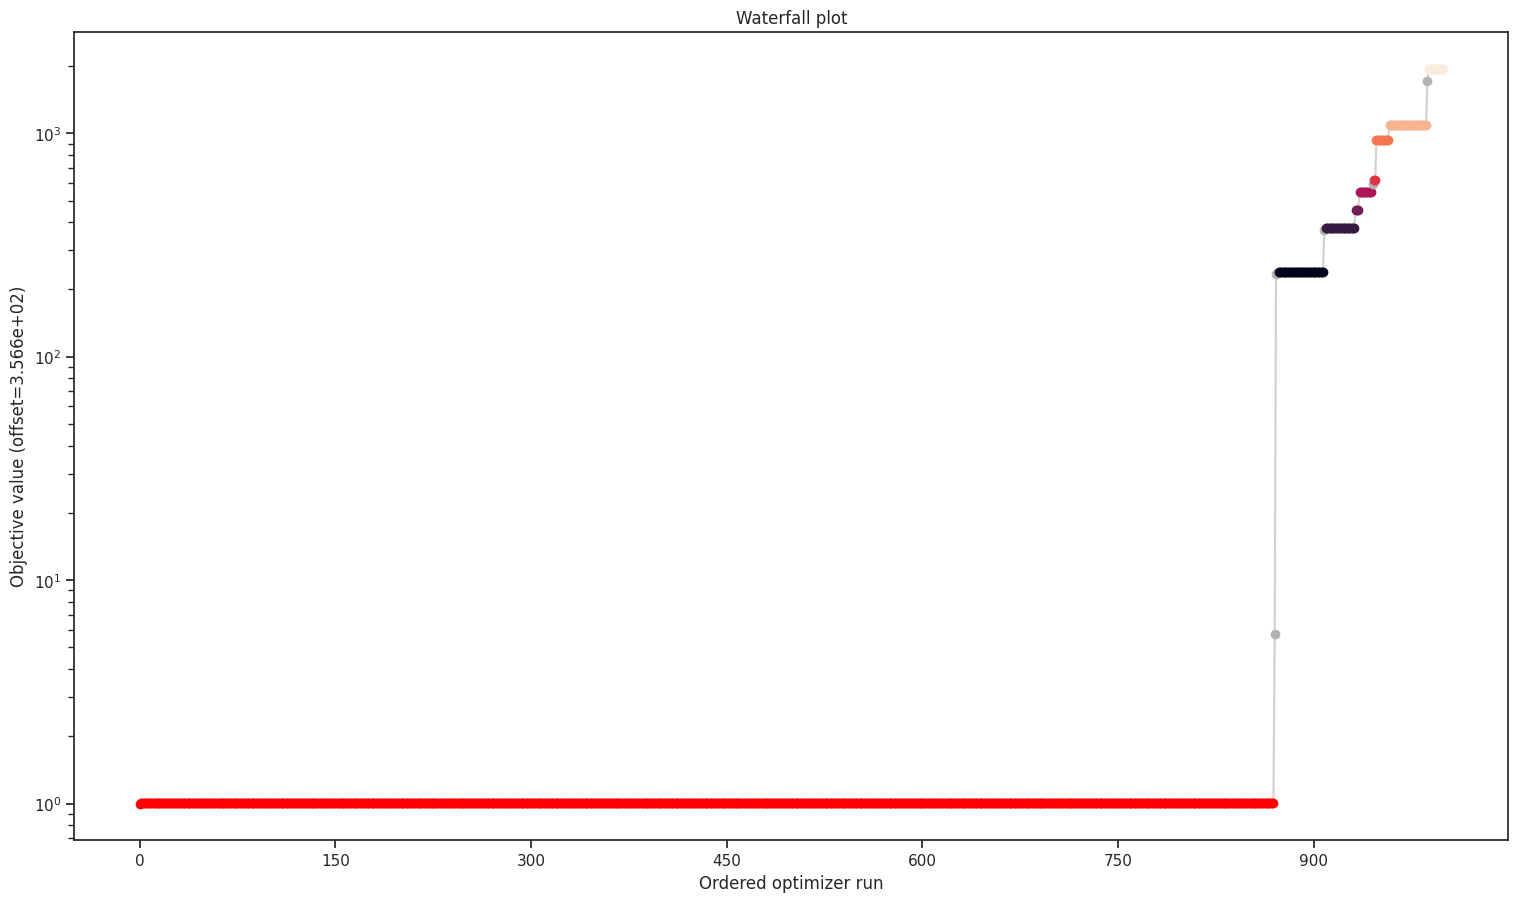

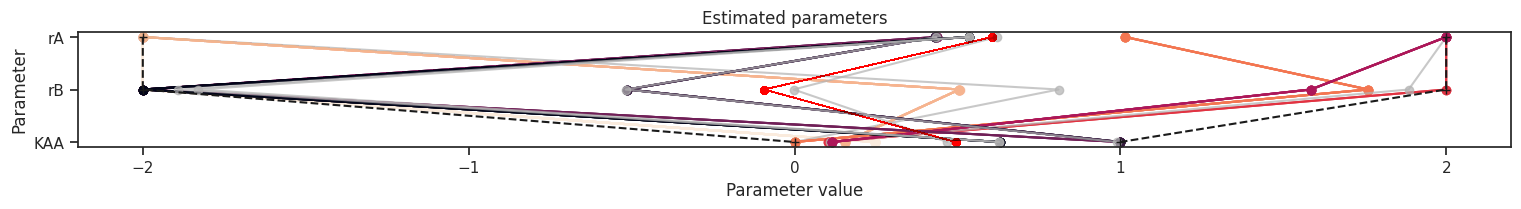

In [105]:
ax = visualize.optimization_scatter(result=result)
ax = visualize.waterfall(result)
# ax = visualize.optimizer_convergence(result)
ax = visualize.parameters(result)

In [106]:
result_df = result.optimize_result.as_dataframe()
result_df

,id,x,fval,grad,hess,res,sres,n_fval,n_grad,n_hess,...,x0,fval0,history,exitflag,time,message,optimizer,free_indices,inner_parameters,spline_knots
0,613,"[0.6067321020291514, -0.09344011459339466, 0.0...",-355.621877,None,None,None,None,193,0,0,...,"[1.2107542330609786, 1.4304614957712962, 0.0, ...",4228.995522,<pypesto.history.memory.MemoryHistory object a...,0,1.034041,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
1,846,"[0.6067232737680859, -0.0934553632936852, 0.0,...",-355.621877,None,None,None,None,246,0,0,...,"[-1.8182784266137886, -0.7577404002989754, 0.0...",2180.575829,<pypesto.history.memory.MemoryHistory object a...,0,1.291785,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
2,789,"[0.6067212726961935, -0.09344118306128071, 0.0...",-355.621877,None,None,None,None,186,0,0,...,"[0.04007507981216607, 1.663338552477379, 0.0, ...",3750.465855,<pypesto.history.memory.MemoryHistory object a...,0,1.012121,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
3,925,"[0.6067329661160699, -0.09346579492184043, 0.0...",-355.621876,None,None,None,None,173,0,0,...,"[-0.5970865989614409, -1.209765389623573, 0.0,...",1509.675340,<pypesto.history.memory.MemoryHistory object a...,0,0.725829,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
4,34,"[0.6067333863051267, -0.09350697271691344, 0.0...",-355.621876,None,None,None,None,231,0,0,...,"[1.9230999865686909, -0.0196935984746216, 0.0,...",11076.425752,<pypesto.history.memory.MemoryHistory object a...,0,1.498448,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,389,"[-2.0, -2.0, 0.0, 0.24786651357781503, 0.0, 0....",1594.468247,None,None,None,None,78,0,0,...,"[-1.469305034433785, -1.5498220110024157, 0.0,...",1903.237314,<pypesto.history.memory.MemoryHistory object a...,0,0.479221,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
996,154,"[-2.0, -2.0, 0.0, 0.2479185620777467, 0.0, 0.0...",1594.468247,None,None,None,None,79,0,0,...,"[-1.5264640473726812, -1.7980608792358863, 0.0...",1950.789512,<pypesto.history.memory.MemoryHistory object a...,0,0.460922,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
997,50,"[-2.0, -2.0, 0.0, 0.2478598633867367, 0.0, 0.0...",1594.468251,None,None,None,None,138,0,0,...,"[-1.3329467467554372, -1.3871391034158957, 0.0...",1885.102630,<pypesto.history.memory.MemoryHistory object a...,0,1.164458,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None
998,43,"[-2.0, -2.0, 0.0, 0.2479334956649642, 0.0, 0.0...",1594.468267,None,None,None,None,82,0,0,...,"[-1.8249718238769113, -1.9921256169762693, 0.0...",1791.449750,<pypesto.history.memory.MemoryHistory object a...,0,0.583991,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 3]",None,None


In [107]:
for x_ in result.optimize_result.x:
    print(10**x_, x_)

[4.04326403 0.80641739 1.         3.11974801 1.         1.
 1.         1.        ] [ 0.6067321  -0.09344011  0.          0.49411952  0.          0.
  0.          0.        ]
[4.04318184 0.80638908 1.         3.1196176  1.         1.
 1.         1.        ] [ 0.60672327 -0.09345536  0.          0.49410136  0.          0.
  0.          0.        ]
[4.04316321 0.80641541 1.         3.11975246 1.         1.
 1.         1.        ] [ 0.60672127 -0.09344118  0.          0.49412014  0.          0.
  0.          0.        ]
[4.04327207 0.80636971 1.         3.11968301 1.         1.
 1.         1.        ] [ 0.60673297 -0.09346579  0.          0.49411047  0.          0.
  0.          0.        ]
[4.04327598 0.80629326 1.         3.11973464 1.         1.
 1.         1.        ] [ 0.60673339 -0.09350697  0.          0.49411766  0.          0.
  0.          0.        ]
[4.04328125 0.80637273 1.         3.11981707 1.         1.
 1.         1.        ] [ 0.60673395 -0.09346417  0.          0.4941291

In [108]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), 
    n_chains=3,
)

Initializing betas with "near-exponential decay".


In [109]:
# %%capture
n_samples = 20000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    result=result,
    # x0=np.array([
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     # np.log(1/0.5),
    #     # np.log(1/18),
    #     # np.log(1/1),
    #     # np.log(0.5),
    #     # # 0,
    #     # # 0,
    #     # # 0,
    #     # # 2,
    #     # # np.log(1/rA_true),
    #     # # np.log(1/rB_true),
    #     # # np.log(1/rX_true),
    #     # # np.log(1/KBB_true),
    #     # np.log(1e5),
    #     # np.log(1/kp_kt_ratio_true),
    #     # np.log(1/kd_kt_true),
    # ]),
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

100%|█████████████████████████████████████| 20000/20000 [03:47<00:00, 87.87it/s]
Elapsed time: 214.61744865399987


Elapsed time: 214.62


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


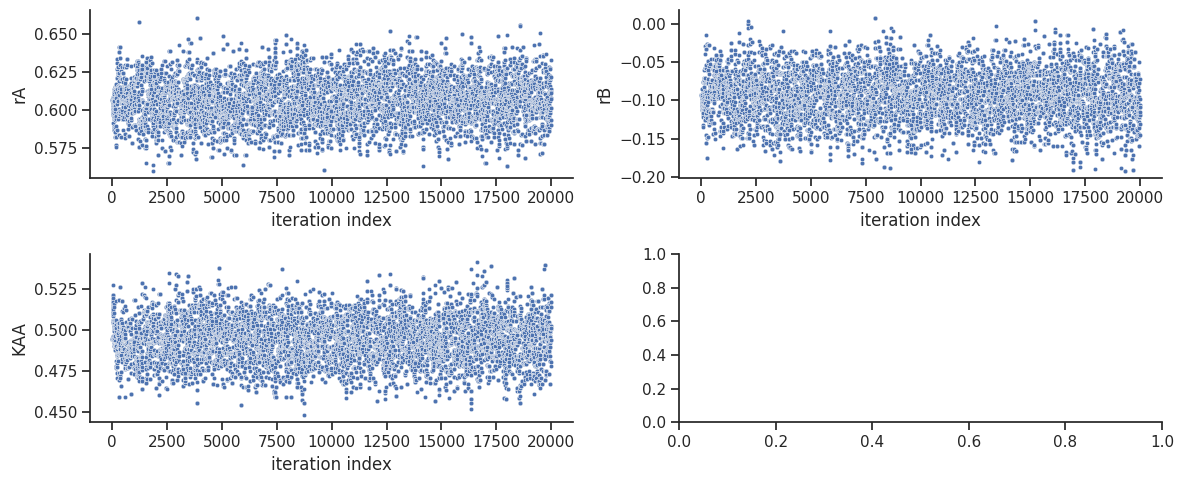

In [110]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# # ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([0, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([0, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")


Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0
Geweke burn-in index: 0


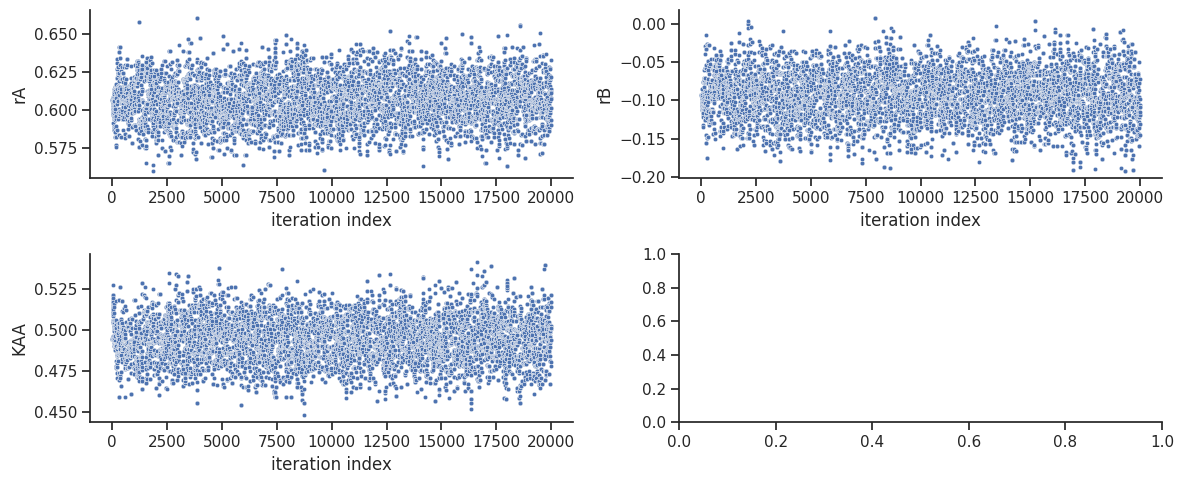

In [111]:
it_start = sample.geweke_test(result=result)
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)
# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[0][0].plot([it_start, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([it_start, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([it_start, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([it_start, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([it_start, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([it_start, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([it_start, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")

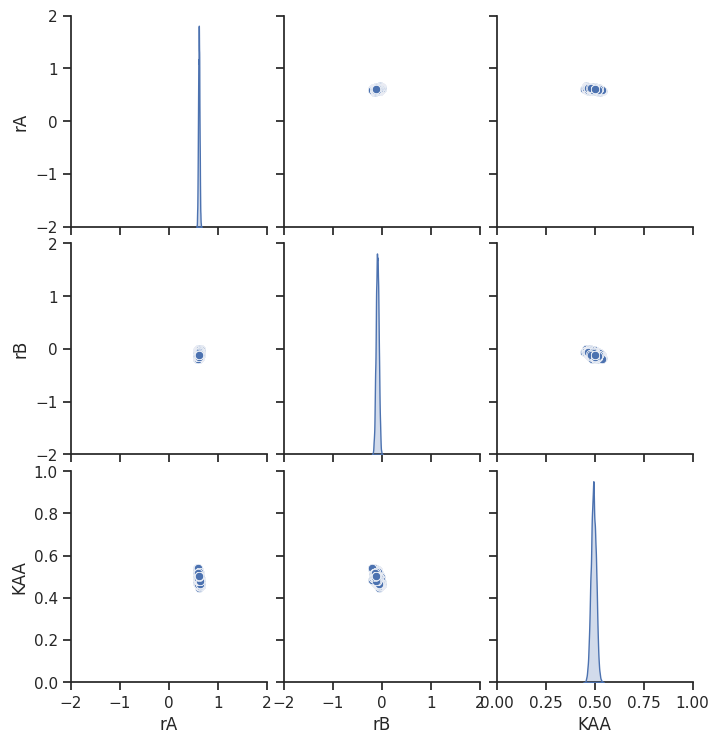

In [112]:
visualize.sampling_scatter(result=result)

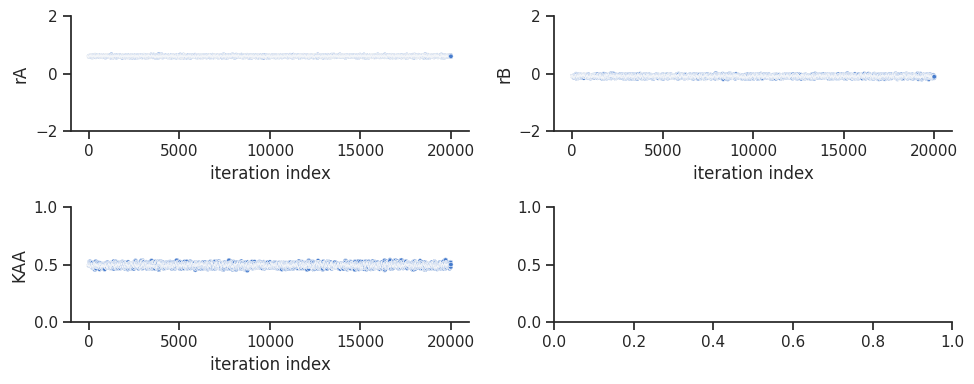

In [113]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=True, full_trace=True, size=(10, 4),
    # par_indices=[0,1,2,3]
)
# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kt_true, kt_true]), "k--")

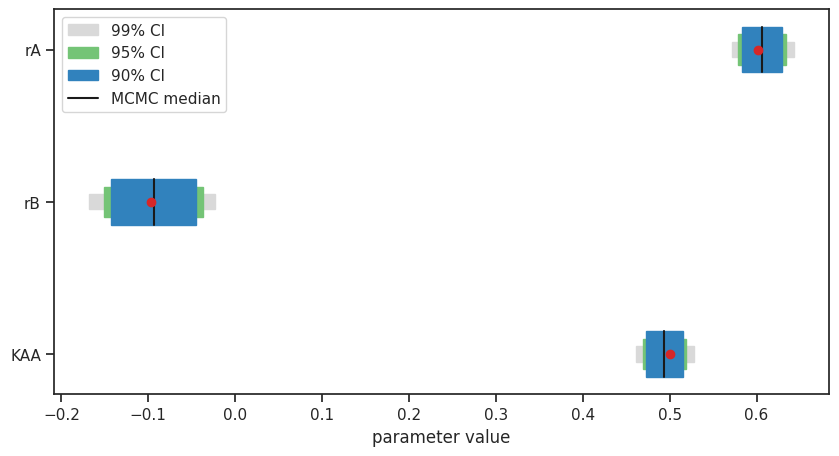

In [114]:
alpha = [99, 95, 90]
import matplotlib.pyplot as plt
ax = visualize.sampling_parameter_cis(result, alpha=alpha, size=(10, 5))
line1, = ax.plot([np.log10(4.0)], 0, 'o', color='tab:red')
line2, = ax.plot([np.log10(0.8)], 1, 'o', color='tab:red')
line3, = ax.plot([0.5], 2, 'o', color='tab:red')
# line4, = ax.plot([0.05], 3, 'o', color='tab:red')
# line5, = ax.plot([0.3], 4, 'o', color='tab:red')
# line7, = ax.plot([0.1], 5, 'o', color='tab:red')
# line3, = ax.plot([np.log(rX_true)], 2, 'o', color='tab:red')
# line4, = ax.plot([np.log(KBB_true)], 3, 'o', color='tab:red')
# line5, = ax.plot([np.log(kpAA_true)], 4, 'o', color='tab:red')
# line6, = ax.plot([np.log(kp_kt_ratio_true)], 5, 'o', color='tab:red')
# line7, = ax.plot([np.log(kd_kt_true)], 6, 'o', color='tab:red')
# line4, = ax.plot([np.log(kpAA_true)], 3, 'o', color='tab:red')
# line5, = ax.plot([np.log(kt_true)], 4, 'o', color='tab:red')

# ax.legend()
# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

unique_handles_labels = list(dict(zip(labels, handles)).items())
unique_labels, unique_handles = zip(*unique_handles_labels)

# Update the legend with unique handles and labels
ax.legend(unique_handles, unique_labels)
# ax.set_yticks([0,1,2,3,4,5,6],['$r_{A}$', '$r_{B}$', '$r_{X}$', '$K_{BB}$', '$k_{pAA}$', '${k_{pAA}}{k_{t}}^{-1}$', '${k_{d}}{k_{t}}$'])
ax.set_xlabel('parameter value')
ax.set_ylabel('')
# ax.set_xlim(-5, 5)
plt.show()
# ax.vlines(np.log([k1_true, k2_true]), 0, 1, color="k", linestyle="--")

In [119]:
print(sample.calculate_ci_mcmc_sample(result, ci_level=0.95)[0])
print(sample.calculate_ci_mcmc_sample(result, ci_level=0.95)[1])
print(10.**sample.calculate_ci_mcmc_sample(result, ci_level=0.95)[0])
print(10.**sample.calculate_ci_mcmc_sample(result, ci_level=0.95)[1])

[ 0.57887588 -0.15119107  0.46899805]
[ 0.63345795 -0.03651095  0.51896775]
[3.79206596 0.70600687 2.94440842]
[4.299896   0.9193673  3.30345011]


In [122]:
print(result.optimize_result.x[0])
print(10**result.optimize_result.x[0])

[ 0.6067321  -0.09344011  0.          0.49411952  0.          0.
  0.          0.        ]
[4.04326403 0.80641739 1.         3.11974801 1.         1.
 1.         1.        ]


In [ ]:
for i_chain in range(len(result.sample_result.betas)):
    ax = visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}"
    )
    
    y_max_00 = ax[0][0].get_ylim()[1]
    y_max_01 = ax[0][1].get_ylim()[1]
    y_max_02 = ax[0][2].get_ylim()[1]
    y_max_10 = ax[1][0].get_ylim()[1]
    y_max_11 = ax[1][1].get_ylim()[1]
    y_max_12 = ax[1][2].get_ylim()[1]
    y_max_20 = ax[2][0].get_ylim()[1]
    
    ax[0][0].vlines(np.log(rA_true),   0, y_max_00, color="tab:red", linestyle="--")
    ax[0][1].vlines(np.log(rB_true),   0, y_max_01, color="tab:red", linestyle="--")
    ax[0][2].vlines(np.log(rX_true),   0, y_max_02, color="tab:red", linestyle="--")
    ax[1][0].vlines(np.log(KBB_true),  0, y_max_10, color="tab:red", linestyle="--")
    ax[1][1].vlines(np.log(kpAA_true), 0, y_max_11, color="tab:red", linestyle="--")
    ax[1][2].vlines(np.log(kp_kt_ratio_true), 0, y_max_12, color="tab:red", linestyle="--")
    ax[2][0].vlines(np.log(kd_kt_true), 0, y_max_20, color="tab:red", linestyle="--")

In [ ]:
# kAA, kAB, kAC
# kBA, kBB, kBC
# kCA, kCB, kCC


# rAA = kAA / kAA = 1
# rAB = kAA / kAB
# rAC = kAA / kAC

# rBA = kBB / kBA
# rBB = kBB / kBB = 1
# rBC = kBB / kBC

# rCA = kCC / kCA
# rCB = kCC / kCB
# rCC = kCC / kCC = 1


In [ ]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

In [ ]:
from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    # labels={"A": "state_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=CONDITION,
    # condition_ids=["condition_0", "condition_1", "condition_2"],  # `None` for all conditions
    # output_ids=["A", "B"],  # `None` for all outputs
)

In [ ]:
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(20, 10),
    # labels={"A": "obs_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=OUTPUT,
)

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
def show_measurement_fit(petab_problem, engine):


    mdf = petab_problem.measurement_df
    # Create a custom objective with new output timepoints.
    conditions = mdf[SIMULATION_CONDITION_ID].unique()
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [np.array([5.04038772,10.08077544,29.8546042 ,60.09693053,119.80613893, 240.38772213])]
    # print(timepoints)
    # timepoints = np.arange(min(timepoints[0]), max(timepoints), 0.1)
    # print(timepoints)
    # amici_objective_custom = amici_objective.set_custom_timepoints(
    #     timepoints=timepoints
    # )

    # Create an observable predictor with the custom objective.
    predictor_y_custom = AmiciPredictor(
        amici_objective,
        post_processor=post_processor_y,
        output_ids=observable_ids,
        condition_ids=[edata.id for edata in amici_objective.edatas],
    )

    # Predict then plot.
    ensemble_prediction = ensemble.predict(
        predictor_y_custom, prediction_id=AMICI_Y, engine=engine
    )

    ax = visualize.sampling_prediction_trajectories(
        ensemble_prediction,
        levels=credibility_interval_levels,
        groupby=CONDITION,
        measurement_df=mdf,
        size=(12,6),
    )
    
    return ax
# import matplotlib.pyplot as plt
# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# # ax[1][1].set_title('')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

ax = show_measurement_fit(petab_problem, engine)
plt.tight_layout()
fig = ax[0][0].get_figure()
fig.savefig('FRP2_measurement_fit.png')
plt.show()

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
mdf = petab_problem.measurement_df
mdf

# count the number of observables in mdf


# get the timepoints for each condition


# for c in conditions:
#     timepoints = mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique()
#     print(timepoints)
    
# Convert into list comprehension

print(timepoints)

In [ ]:
mdf

In [ ]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    measurement_df=mdf,
    # axes=ax,
)
# plt.tight_layout()

# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# ax[1][1].set_title('')
# ax[0].set_ylim([-0.1, 2.5])
# ax[1].set_ylim([-0.1, 2.5])
# ax[2].set_ylim([-0.1, 2.5])
# # fig.set_title('')
# ax[0].set_xlabel('Time (s)')
# ax[1].set_xlabel('Time (s)')
# ax[2].set_xlabel('Time (s)')
# ax[0].set_ylabel('Simulated Concentration (M)')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

plt.show()

mdf